# **Final Project**


# Table of Contents:
1. [Introduction](#Intro)
2. [Collect data](#Collect)
3. [Data Cleaning & Handling Missing Data](#Cleaning)
4. [Descriptive Statistics](#Descr)
5. [Data Visualization](#Visu)
6. [Conclusion](#CCL)

# ***1) Introduction*** <a name="Intro"> </a>

# **GOAL**

The goal of this project is to analyze the evolution of the NBA play style among 2 decades. To do so, I will focus my analysis on the team statistics based on 1996-97, 2000-01, 2010-11 and 2018-19 seasons. 

There are exactly 21 categories which are:
 
- **Season**:	*Year of the season*

- **Team**: *Team name*

- **Won**: Win percentage

- **Total**: *Average number of points scored per game* 

- **FGM_team**:	*Field Goals Made* 

- **FGA_team**:	*Field Goals Attempted* 

- **3PM_team**:	*3 Point Field Goals Made* 

- **3PA_team**:	*3 Point Field Goals Attempted*

- **FTM_team**:	*Free Throws Made*

- **FTA_team**:	*Free Throws Attempted*

- **OREB_team**: *Offensive Rebounds*

- **DREB_team**: *Defensive Rebounds*

- **REB_team**:	*Rebounds*

- **AST_team**:	*Assists* 

- **TOV_team**:	*Turnovers*
 
- **STL_team**:	*Steals* 

- **BLK_team**:	*Blocks*

- **PF_team**: *Personnal fouls*

- **FG%_team**:	*Field Goal Percentage* 

- **3P%_team**:	*3 Point Field Goals Percentage* 

- **FT%_team**: *Free Throw Percentage*




Source:
https://www.nbastuffer.com



We first introduce all the libraries we will need for the project:


In [38]:
import matplotlib.pyplot as plt       #importing matplot library
import numpy as np                    #importing numpy library
import pandas as pd                   #importing pandas library
import seaborn as sns                 #importing seaborn library
import folium                         #importing map library
from scipy import stats         
import matplotlib.pyplot as plt
import plotly.express as px  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split

# **2) Collect data** <a name="Collect"> </a>

This data set is created by rLoper, and has been found online on Kaggle. It regroups all nba teams stats from 1996 to 2018. The database can be found on this link:
https://www.kaggle.com/rloper/19962018-nba-stats-complete-with-player-stats

Let's create a path variable to contain the directory of the csv file we have and then read our database using pandas:

In [39]:
path1='https://raw.githubusercontent.com/simonssg67/NBA_Project/main/NBA_teams_stats_since1996.csv'
database=pd.read_csv(path1)

Then we create a dataframe using pandas to make our database readable before doing some cleaning 

In [40]:
df = pd.DataFrame(database)
df

,Unnamed: 0,Season,Date,Season_Half,Game,Team,Q1,Q2,Q3,Q4,Total,Home/Away,Won,WonQ1,WonH1,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team,Player_1,Min_player1,FGM_player1,FGA_player1,FG%_player1,3PM_player1,3PA_player1,3P%_player1,...,FG%_player4,3PM_player4,3PA_player4,3P%_player4,FTM_player4,FTA_player4,FT%_player4,OREB_player4,DREB_player4,REB_player4,AST_player4,STL_player4,BLK_player4,TOV_player4,PF_player4,PTS_player4,+/-_player4,Height_(in)_player4,Player_5,Min_player5,FGM_player5,FGA_player5,FG%_player5,3PM_player5,3PA_player5,3P%_player5,FTM_player5,FTA_player5,FT%_player5,OREB_player5,DREB_player5,REB_player5,AST_player5,STL_player5,BLK_player5,TOV_player5,PF_player5,PTS_player5,+/-_player5,Height_(in)_player5
0,0,96,1996-11-01,1,29600001,CHI,27,21,32,27,107,Away,1,0,0,42,74,1,13,22,32,8,29,37,28,19,7,8,23,0.630500,0.066600,0.581286,Michael Jordan,0 days 00:43:27.000000000,10,22,0.455,0,5,0.000,...,0.750,0,0,0.000,1,1,1.000,2,11,13,3,1,2,1,3,13,11,78,Luc Longley,0 days 00:11:24.000000000,2,3,0.667,0,0,0.000,0,0,0.000,1,0,1,2,0,1,4,5,4,-12,86
1,1,96,1996-11-01,1,29600001,BOS,28,31,18,21,98,Home,0,1,1,38,84,8,20,14,23,14,22,36,20,18,10,2,33,0.440875,0.413833,0.564625,David Wesley,0 days 00:40:47.000000000,8,16,0.500,1,4,0.250,...,0.600,2,4,0.500,4,4,1.000,0,1,1,6,1,0,3,2,24,-4,71,Antoine Walker,0 days 00:26:35.000000000,5,12,0.417,1,3,0.333,1,4,0.250,1,2,3,0,0,0,1,4,12,3,81
2,2,96,1996-11-01,1,29600002,CLE,28,25,17,20,90,Away,1,1,1,34,72,5,10,17,20,12,23,35,16,15,11,1,24,0.456900,0.444500,0.924500,Terrell Brandon,0 days 00:36:39.000000000,9,19,0.474,2,3,0.667,...,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,Bob Sura,0 days 00:38:20.000000000,4,10,0.400,0,1,0.000,0,0,0.000,2,4,6,3,1,0,0,3,8,19,77
3,3,96,1996-11-01,1,29600002,BKN,19,20,16,22,77,Home,0,0,0,23,58,9,18,22,33,11,24,35,13,21,7,7,19,0.366111,0.375000,0.437500,Kendall Gill,0 days 00:41:07.000000000,5,15,0.333,0,1,0.000,...,0.333,0,2,0.000,1,2,0.500,0,1,1,6,1,0,2,2,5,-18,74,Shawn Bradley,0 days 00:34:45.000000000,2,5,0.400,0,0,0.000,5,8,0.625,2,6,8,1,0,5,3,2,9,-6,90
4,4,96,1996-11-01,1,29600003,MIL,31,27,29,24,111,Away,1,1,1,38,84,4,9,31,44,19,31,50,21,14,9,7,30,0.393222,0.500000,0.672625,Vin Baker,0 days 00:38:46.000000000,7,18,0.389,0,0,0.000,...,0.615,0,0,0.000,6,8,0.750,3,3,6,8,0,0,1,5,22,17,73,Armen Gilliam,0 days 00:24:00.000000000,3,8,0.375,0,0,0.000,1,2,0.500,4,10,14,1,1,0,2,5,7,6,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26409,54509,18,2019-04-10,2,21801228,DEN,22,29,22,26,99,Home,1,1,1,39,87,10,33,11,17,12,41,53,23,12,6,4,12,0.495444,0.454000,0.633333,Nikola Jokic,0 days 00:36:35.000000000,13,26,0.500,1,7,0.143,...,0.400,1,4,0.250,1,2,0.500,1,8,9,4,1,1,1,1,10,9,77,Gary Harris,0 days 00:38:53.000000000,5,11,0.455,0,3,0.000,4,5,0.800,2,1,3,1,1,1,3,2,14,6,76
26410,54510,18,2019-04-10,2,21801229,UTA,26,40,31,29,137,Away,0,0,0,47,106,14,35,29,33,17,40,57,31,17,8,11,24,0.425900,0.447857,0.870857,Donovan Mitchell,0,0,0,0.000,0,0,0.000,...,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,Derrick Favors,0,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0
26411,54511,18,2019-04-10,2,21801229,LAC,39,31,32,24,143,Home,1,1,1,54,106,12,28,23,30,12,40,52,34,12,7,5,27,0.496167,0.297375,0.788400,Tobias Harris,0,0,0,0.000,0,0,0.000,...,0.769,0,0,0.000,4,6,0.667,3,4,7,5,0,1,2,1,24,11,80,Patrick Beverley,0 days 00:21:19.000000000,5,9,0.556,4,7,0.571,0,0,0.000,0,6,6,6,1,0,1,4,14,-4,73
26412,54512,18,2019-04-10,2,21801230,SAC,39,48,26,18,131,Away,0,1,1,50,96,18,43,13,16,12,23,35,25,10,5,1,17,0.558000,0.403636,0.861167,Buddy Hield,0 days 00:16:07.000000000,3,6,0.500,3,5,0.600,...,0.3

# **3) Data Cleaning & Handling Missing Data** <a name="Cleaning"> </a>


First let's check if there are some missing values

In [41]:
df.isnull().value_counts()

Unnamed: 0  Season  Date   Season_Half  Game   Team   Q1     Q2     Q3     Q4     Total  Home/Away  Won    WonQ1  WonH1  FGM_team  FGA_team  3PM_team  3PA_team  FTM_team  FTA_team  OREB_team  DREB_team  REB_team  AST_team  TOV_team  STL_team  BLK_team  PF_team  FG%_team  3P%_team  FT%_team  Player_1  Min_player1  FGM_player1  FGA_player1  FG%_player1  3PM_player1  3PA_player1  3P%_player1  FTM_player1  FTA_player1  FT%_player1  OREB_player1  DREB_player1  REB_player1  AST_player1  STL_player1  BLK_player1  TOV_player1  PF_player1  PTS_player1  +/-_player1  Height_(in)_player1  Player_2  Min_player2  FGM_player2  FGA_player2  FG%_player2  3PM_player2  3PA_player2  3P%_player2  FTM_player2  FTA_player2  FT%_player2  OREB_player2  DREB_player2  REB_player2  AST_player2  STL_player2  BLK_player2  TOV_player2  PF_player2  PTS_player2  +/-_player2  Height_(in)_player2  Player_3  Min_player3  FGM_player3  FGA_player3  FG%_player3  3PM_player3  3PA_player3  3P%_player3  FTM_player3  FTA_player

There aren't any missing values ! Good news !

Let's do some data cleaning, beginning dropping the columns we are not interested in. 

In [42]:
#We delete columns we are not interested in. 
df = df.drop(['Unnamed: 0',
              'Date',
              'Season_Half',
              'Game',
              'Q1',
              'Q2',
              'Q3',
              'Q4',
              'Home/Away',
              #'Won',
              'WonQ1',
              'WonH1'], axis=1)
df

,Season,Team,Total,Won,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team,Player_1,Min_player1,FGM_player1,FGA_player1,FG%_player1,3PM_player1,3PA_player1,3P%_player1,FTM_player1,FTA_player1,FT%_player1,OREB_player1,DREB_player1,REB_player1,AST_player1,STL_player1,BLK_player1,TOV_player1,PF_player1,...,FG%_player4,3PM_player4,3PA_player4,3P%_player4,FTM_player4,FTA_player4,FT%_player4,OREB_player4,DREB_player4,REB_player4,AST_player4,STL_player4,BLK_player4,TOV_player4,PF_player4,PTS_player4,+/-_player4,Height_(in)_player4,Player_5,Min_player5,FGM_player5,FGA_player5,FG%_player5,3PM_player5,3PA_player5,3P%_player5,FTM_player5,FTA_player5,FT%_player5,OREB_player5,DREB_player5,REB_player5,AST_player5,STL_player5,BLK_player5,TOV_player5,PF_player5,PTS_player5,+/-_player5,Height_(in)_player5
0,96,CHI,107,1,42,74,1,13,22,32,8,29,37,28,19,7,8,23,0.630500,0.066600,0.581286,Michael Jordan,0 days 00:43:27.000000000,10,22,0.455,0,5,0.000,10,13,0.769,1,3,4,3,0,0,1,2,...,0.750,0,0,0.000,1,1,1.000,2,11,13,3,1,2,1,3,13,11,78,Luc Longley,0 days 00:11:24.000000000,2,3,0.667,0,0,0.000,0,0,0.000,1,0,1,2,0,1,4,5,4,-12,86
1,96,BOS,98,0,38,84,8,20,14,23,14,22,36,20,18,10,2,33,0.440875,0.413833,0.564625,David Wesley,0 days 00:40:47.000000000,8,16,0.500,1,4,0.250,2,2,1.000,1,2,3,6,2,0,1,4,...,0.600,2,4,0.500,4,4,1.000,0,1,1,6,1,0,3,2,24,-4,71,Antoine Walker,0 days 00:26:35.000000000,5,12,0.417,1,3,0.333,1,4,0.250,1,2,3,0,0,0,1,4,12,3,81
2,96,CLE,90,1,34,72,5,10,17,20,12,23,35,16,15,11,1,24,0.456900,0.444500,0.924500,Terrell Brandon,0 days 00:36:39.000000000,9,19,0.474,2,3,0.667,5,6,0.833,0,6,6,5,3,0,3,4,...,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,Bob Sura,0 days 00:38:20.000000000,4,10,0.400,0,1,0.000,0,0,0.000,2,4,6,3,1,0,0,3,8,19,77
3,96,BKN,77,0,23,58,9,18,22,33,11,24,35,13,21,7,7,19,0.366111,0.375000,0.437500,Kendall Gill,0 days 00:41:07.000000000,5,15,0.333,0,1,0.000,12,12,1.000,2,3,5,3,1,0,5,4,...,0.333,0,2,0.000,1,2,0.500,0,1,1,6,1,0,2,2,5,-18,74,Shawn Bradley,0 days 00:34:45.000000000,2,5,0.400,0,0,0.000,5,8,0.625,2,6,8,1,0,5,3,2,9,-6,90
4,96,MIL,111,1,38,84,4,9,31,44,19,31,50,21,14,9,7,30,0.393222,0.500000,0.672625,Vin Baker,0 days 00:38:46.000000000,7,18,0.389,0,0,0.000,11,12,0.917,6,7,13,2,1,3,5,5,...,0.615,0,0,0.000,6,8,0.750,3,3,6,8,0,0,1,5,22,17,73,Armen Gilliam,0 days 00:24:00.000000000,3,8,0.375,0,0,0.000,1,2,0.500,4,10,14,1,1,0,2,5,7,6,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26409,18,DEN,99,1,39,87,10,33,11,17,12,41,53,23,12,6,4,12,0.495444,0.454000,0.633333,Nikola Jokic,0 days 00:36:35.000000000,13,26,0.500,1,7,0.143,2,2,1.000,3,11,14,2,3,0,4,4,...,0.400,1,4,0.250,1,2,0.500,1,8,9,4,1,1,1,1,10,9,77,Gary Harris,0 days 00:38:53.000000000,5,11,0.455,0,3,0.000,4,5,0.800,2,1,3,1,1,1,3,2,14,6,76
26410,18,UTA,137,0,47,106,14,35,29,33,17,40,57,31,17,8,11,24,0.425900,0.447857,0.870857,Donovan Mitchell,0,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,...,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,Derrick Favors,0,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0
26411,18,LAC,143,1,54,106,12,28,23,30,12,40,52,34,12,7,5,27,0.496167,0.297375,0.788400,Tobias Harris,0,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,...,0.769,0,0,0.000,4,6,0.667,3,4,7,5,0,1,2,1,24,11,80,Patrick Beverley,0 days 00:21:19.000000000,5,9,0.556,4,7,0.571,0,0,0.000,0,6,6,6,1,0,1,4,14,-4,73
26412,18,SAC,131,0,50,96,18,43,13,16,12,23,35,25,10,5,1,17,0.558000,0.403636,0.861167,Buddy Hield,0 days 00:16:07.000000000,3,6,0.500,3,5,0.600,0,0,0.000,1,2,3,2,0,0,1,0,...,0.313,3,11,0.273,2,2,1.000,0,1,1,1,0,0,1,0,15,-18,78,Willie Cauley-Stein,0 days 00:17:20.000000000,3,3,1.000,0,0,0.

There are a lot of columns that will not be treated in this notebook, it's time to slice my database to use only the 24 first columns. Plus I am going to create 4 different databases for each season I am interested in. 

In [43]:
#I start with the 1996 Season
df96=df[df['Season']==96]

In [44]:
#I am only interested in the team statistics so I select the first 24 columns and sort them by team and season
season96 = df96.groupby(['Team','Season'],as_index=False).mean().iloc[:, 0:21]
season96
#My season 96 database is ready !

,Team,Season,Total,Won,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team
0,ATL,96,94.804878,0.682927,34.268293,76.865854,8.036585,22.341463,18.170732,23.817073,12.439024,28.597561,41.036585,18.987805,14.365854,8.524390,5.207317,19.353659,0.427145,0.335269,0.755964
1,BKN,96,97.243902,0.317073,36.500000,86.426829,5.902439,16.707317,18.317073,24.768293,17.195122,28.963415,46.158537,21.048780,14.963415,8.256098,5.853659,22.731707,0.402461,0.310028,0.713578
2,BOS,96,100.585366,0.182927,37.170732,84.597561,5.695122,16.207317,20.085366,26.792683,13.280488,26.487805,39.768293,21.756098,15.621951,9.865854,3.792683,23.158537,0.430354,0.311724,0.748852
3,CHI,96,103.146341,0.841463,39.963415,84.426829,6.378049,17.109756,16.841463,22.536585,15.060976,30.000000,45.060976,26.121951,13.109756,8.743902,4.048780,19.682927,0.455587,0.342887,0.723339
4,CLE,96,87.560976,0.512195,32.975610,72.829268,5.890244,15.658537,15.634146,21.621951,11.085366,26.329268,37.414634,20.902439,13.646341,8.012195,3.841463,22.951220,0.434367,0.356712,0.733746
5,DAL,96,90.621951,0.292683,34.292683,78.634146,5.231707,16.036585,16.768293,23.390244,12.658537,27.573171,40.231707,20.268293,15.280488,7.975610,4.256098,21.890244,0.421011,0.277569,0.705482
6,DEN,96,97.719512,0.256098,35.682927,81.353659,7.682927,20.743902,18.475610,24.280488,12.097561,29.865854,41.963415,22.987805,15.731707,6.134146,5.939024,21.707317,0.427518,0.332456,0.747008
7,DET,96,94.182927,0.658537,34.463415,74.304878,7.097561,18.280488,18.134146,24.329268,10.463415,27.951220,38.414634,18.939024,11.987805,7.707317,3.451220,20.121951,0.445205,0.344380,0.749520
8,GSW,96,99.646341,0.365854,36.524390,80.012195,5.865854,16.621951,20.682927,26.585366,13.243902,27.524390,40.768293,22.170732,16.500000,7.463415,4.378049,21.792683,0.436566,0.322247,0.752215
9,HOU,96,100.585366,0.695122,36.987805,79.000000,8.170732,22.390244,18.329268,24.292683,11.292683,31.280488,42.573171,24.524390,15.975610,8.378049,4.231707,19.585366,0.443349,0.343836,0.735851


Now I have my 96 database, let's do the same process for season 2000, 2010 and 2018

In [45]:
df00=df[df['Season']==00]
season00 = df00.groupby(['Team','Season'],as_index=False).mean().iloc[:, 0:21]
season00

,Team,Season,Total,Won,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team
0,ATL,0,90.963415,0.304878,34.963415,81.060976,4.000000,11.304878,16.731707,22.060976,12.512195,30.256098,42.768293,18.878049,15.731707,7.731707,4.719512,22.646341,0.400555,0.320417,0.759281
1,BKN,0,92.097561,0.317073,33.865854,79.707317,4.402439,13.219512,19.829268,26.097561,11.048780,28.365854,39.414634,19.512195,13.865854,7.878049,4.951220,24.121951,0.406324,0.310415,0.761500
2,BOS,0,94.621951,0.439024,33.731707,78.792683,7.207317,19.865854,19.695122,26.609756,10.865854,28.743902,39.609756,20.731707,14.975610,9.353659,4.085366,23.646341,0.411678,0.330977,0.724540
3,CHI,0,87.573171,0.182927,33.182927,78.182927,4.012195,11.585366,17.195122,23.280488,11.292683,27.560976,38.853659,22.073171,14.597561,8.231707,4.621951,23.195122,0.399961,0.313623,0.724740
4,CLE,0,92.207317,0.365854,35.195122,79.548780,2.682927,8.036585,18.987805,24.829268,12.341463,29.658537,42.000000,20.670732,15.731707,7.780488,5.317073,23.109756,0.419562,0.300976,0.760854
5,DAL,0,100.475610,0.646341,37.621951,81.902439,6.304878,16.548780,18.926829,23.829268,10.134146,31.353659,41.487805,21.219512,13.341463,7.536585,6.000000,23.256098,0.442483,0.341253,0.782035
6,DEN,0,96.560976,0.487805,36.329268,83.853659,6.243902,17.609756,17.658537,23.951220,12.719512,31.487805,44.207317,24.000000,13.317073,6.731707,6.560976,22.170732,0.414596,0.310708,0.733461
7,DET,0,95.573171,0.390244,35.573171,83.817073,4.743902,13.560976,19.597561,27.182927,13.463415,31.939024,45.402439,19.841463,15.414634,7.463415,5.426829,23.768293,0.423714,0.334438,0.671696
8,GSW,0,92.487805,0.207317,35.817073,87.500000,3.439024,11.756098,17.414634,24.682927,16.402439,29.085366,45.487805,21.804878,15.280488,9.048780,5.000000,21.060976,0.395281,0.255029,0.700183
9,HOU,0,97.219512,0.548780,35.890244,79.195122,6.146341,17.219512,19.292683,25.439024,11.207317,30.780488,41.987805,19.670732,13.853659,7.158537,4.365854,20.207317,0.438816,0.312714,0.743271


In [46]:
df10=df[df['Season']==10]
season10 = df10.groupby(['Team','Season'],as_index=False).mean().iloc[:, 0:21]
season10

,Team,Season,Total,Won,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team
0,ATL,10,95.000000,0.536585,36.231707,78.402439,6.121951,17.402439,16.414634,21.073171,9.292683,30.000000,39.292683,21.975610,12.780488,6.060976,4.158537,18.951220,0.447149,0.339345,0.761731
1,BKN,10,94.170732,0.292683,35.585366,80.951220,5.597561,16.304878,17.402439,22.939024,11.085366,29.756098,40.841463,21.012195,13.036585,5.585366,4.682927,22.036585,0.432937,0.315553,0.743273
2,BOS,10,96.500000,0.682927,36.865854,75.841463,4.975610,13.646341,17.792683,23.109756,7.792683,31.000000,38.792683,23.426829,13.597561,8.243902,4.195122,20.463415,0.468718,0.318153,0.756583
3,CHA,10,93.292683,0.414634,35.036585,77.621951,4.792683,14.670732,18.426829,24.378049,10.341463,29.804878,40.146341,21.073171,13.695122,6.390244,5.280488,19.963415,0.443407,0.283558,0.750628
4,CHI,10,98.621951,0.756098,37.097561,80.329268,6.231707,17.256098,18.195122,24.487805,11.792683,32.365854,44.158537,22.280488,13.463415,7.219512,5.707317,19.987805,0.452856,0.348690,0.725864
5,CLE,10,95.451220,0.231707,35.195122,81.060976,6.207317,18.158537,18.853659,25.304878,10.439024,29.865854,40.304878,20.975610,13.719512,6.634146,4.158537,20.097561,0.432589,0.309671,0.742853
6,DAL,10,100.243902,0.695122,37.426829,78.817073,7.865854,21.560976,17.524390,22.560976,9.512195,31.926829,41.439024,23.829268,13.500000,6.792683,4.292683,19.207317,0.468501,0.353248,0.754341
7,DEN,10,107.451220,0.609756,38.353659,80.646341,8.073171,20.780488,22.670732,29.621951,9.646341,32.341463,41.987805,22.109756,13.780488,7.378049,4.292683,20.963415,0.466296,0.330742,0.733077
8,DET,10,96.963415,0.365854,37.268293,81.060976,5.756098,15.317073,16.670732,22.609756,11.353659,27.268293,38.621951,21.097561,12.207317,7.256098,4.000000,19.865854,0.445725,0.347614,0.697535
9,GSW,10,103.378049,0.439024,39.646341,85.939024,8.353659,21.329268,15.731707,20.670732,11.646341,28.902439,40.548780,22.524390,14.109756,8.987805,4.951220,22.024390,0.442643,0.356525,0.729763


In [47]:
df18=df[df['Season']==18]
season18 = df18.groupby(['Team','Season'],as_index=False).mean().iloc[:, 0:21]
season18

,Team,Season,Total,Won,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team
0,ATL,18,113.341463,0.353659,41.365854,91.756098,13.012195,37.000000,17.597561,23.390244,11.646341,34.451220,46.097561,25.829268,16.621951,8.231707,5.109756,23.560976,0.432691,0.327449,0.743961
1,BKN,18,112.243902,0.512195,40.256098,89.731707,12.768293,36.158537,18.963415,25.463415,10.975610,35.597561,46.573171,23.829268,14.402439,6.573171,4.134146,21.500000,0.457231,0.321606,0.733010
2,BOS,18,112.390244,0.597561,42.085366,90.524390,12.585366,34.500000,15.634146,19.487805,9.804878,34.743902,44.548780,26.280488,12.426829,8.609756,5.304878,20.365854,0.461625,0.349247,0.797496
3,CHA,18,110.743902,0.475610,40.207317,89.780488,11.914634,33.939024,18.414634,23.109756,9.926829,33.878049,43.804878,23.231707,11.658537,7.207317,4.939024,18.902439,0.441936,0.324341,0.783607
4,CHI,18,104.939024,0.268293,39.829268,87.865854,9.085366,25.890244,16.195122,20.670732,8.756098,34.134146,42.890244,21.902439,13.487805,7.353659,4.280488,20.280488,0.438031,0.314779,0.777259
5,CLE,18,104.475610,0.231707,38.890244,87.609756,10.329268,29.121951,16.365854,20.658537,10.719512,31.939024,42.658537,20.707317,12.634146,6.512195,2.378049,20.024390,0.430263,0.336840,0.780132
6,DAL,18,108.865854,0.402439,38.804878,86.853659,12.463415,36.609756,18.792683,25.317073,10.146341,35.170732,45.317073,23.390244,13.621951,6.500000,4.280488,20.121951,0.446766,0.317845,0.732811
7,DEN,18,110.670732,0.658537,41.939024,90.048780,11.012195,31.353659,15.780488,20.902439,11.853659,34.536585,46.390244,27.378049,12.853659,7.731707,4.426829,20.048780,0.449301,0.323830,0.751344
8,DET,18,107.048780,0.500000,38.841463,88.268293,12.109756,34.804878,17.256098,23.085366,11.414634,33.560976,44.975610,22.500000,12.951220,6.939024,4.036585,22.085366,0.416073,0.308093,0.769740
9,GSW,18,117.682927,0.695122,44.048780,89.768293,13.256098,34.439024,16.329268,20.390244,9.719512,36.463415,46.182927,29.426829,13.756098,7.621951,6.402439,21.426829,0.490475,0.345256,0.771583


# **4) Descriptive statistics**<a name="Descr"></a>

Descriptive statistics will be a very interesting tool since I want to compare the 4 seasons, it will regroup all the teams stats so that it's easier to visualize what stands out. The idea is to extract the lines "mean" for each season and merge them into a single table to do some data visualization. 

In [48]:
mean96 = df96.groupby('Season',as_index=False).mean().iloc[:, 0:20]
mean00 = df00.groupby('Season',as_index=False).mean().iloc[:, 0:20]
mean10 = df10.groupby('Season',as_index=False).mean().iloc[:, 0:20]
mean18 = df18.groupby('Season',as_index=False).mean().iloc[:, 0:20]

Now let's merge what I extracted in a single table.

In [49]:
mean_frames = [mean96, mean00, mean10, mean18]
mean_merged=pd.concat(mean_frames)
mean_merged = mean_merged.drop(['Won'],axis=1)#Not interesting here since the number of win/loss is balanced to 0.5 
mean_merged

,Season,Total,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team
0,96,96.902019,36.038688,79.241379,6.040791,16.780908,18.703112,25.333894,12.652649,28.389823,41.042473,22.019765,15.025652,8.194281,4.902860,22.079899,0.439339,0.328692,0.725904
0,0,94.810345,35.661480,80.522708,4.842725,13.698907,18.574012,24.849033,11.977292,30.439445,42.416737,21.751472,14.383095,7.813709,5.253995,22.314971,0.426512,0.320141,0.739808
0,10,99.550407,37.245528,81.215447,6.457724,18.013415,18.601626,24.364634,10.912195,30.476423,41.388618,21.498780,13.589837,7.326423,4.864228,20.712602,0.444658,0.325694,0.748096
0,18,111.208537,41.082114,89.210569,11.363821,32.008943,17.680488,23.072358,10.347154,34.818293,45.165447,24.586585,13.533333,7.633740,4.953252,20.904472,0.447441,0.328828,0.757968


Now we have our little dataframe let's exploit it and create some graphs

Let's modify the season's dates to have the good graduation on the x axis

In [50]:
mean_merged.iloc[0,0]=1996
mean_merged.iloc[1,0]=2000
mean_merged.iloc[2,0]=2010
mean_merged.iloc[3,0]=2018
mean_merged

,Season,Total,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team
0,1996,96.902019,36.038688,79.241379,6.040791,16.780908,18.703112,25.333894,12.652649,28.389823,41.042473,22.019765,15.025652,8.194281,4.902860,22.079899,0.439339,0.328692,0.725904
0,2000,94.810345,35.661480,80.522708,4.842725,13.698907,18.574012,24.849033,11.977292,30.439445,42.416737,21.751472,14.383095,7.813709,5.253995,22.314971,0.426512,0.320141,0.739808
0,2010,99.550407,37.245528,81.215447,6.457724,18.013415,18.601626,24.364634,10.912195,30.476423,41.388618,21.498780,13.589837,7.326423,4.864228,20.712602,0.444658,0.325694,0.748096
0,2018,111.208537,41.082114,89.210569,11.363821,32.008943,17.680488,23.072358,10.347154,34.818293,45.165447,24.586585,13.533333,7.633740,4.953252,20.904472,0.447441,0.328828,0.757968


Now I can use the new created dataframe mean_merged to create a sublot comparing all the stats between each seasons. 

The idea with the following blocks was to create lists to input into a for loop generating a subplot for each stat category. 

In [51]:
#create a list to do a barplot 
features = ['Season', 'Total', 'FGM_team', 'FGA_team', '3PM_team', '3PA_team',
       'FTM_team', 'FTA_team', 'OREB_team', 'DREB_team', 'REB_team',
       'AST_team', 'TOV_team', 'STL_team', 'BLK_team', 'PF_team', 'FG%_team',
       '3P%_team', 'FT%_team']

In [52]:
#I create 2 lists of limits to limit my y_axis values so that my plots are more readable
limits_up = [2018, 120, 42, 100, 13, 35, 20, 28, 15, 40, 50, 30, 17, 10, 7, 25, 0.60, 0.40, 0.80]
limits_down = [1996, 90, 30, 78, 3, 10, 16, 20, 8, 26, 40, 20, 12, 6, 3, 18, 0.40, 0.30, 0.70]
list(enumerate(limits_up))
list(enumerate(limits_down))

[(0, 1996),
 (1, 90),
 (2, 30),
 (3, 78),
 (4, 3),
 (5, 10),
 (6, 16),
 (7, 20),
 (8, 8),
 (9, 26),
 (10, 40),
 (11, 20),
 (12, 12),
 (13, 6),
 (14, 3),
 (15, 18),
 (16, 0.4),
 (17, 0.3),
 (18, 0.7)]

In [53]:
list(enumerate(features))

[(0, 'Season'),
 (1, 'Total'),
 (2, 'FGM_team'),
 (3, 'FGA_team'),
 (4, '3PM_team'),
 (5, '3PA_team'),
 (6, 'FTM_team'),
 (7, 'FTA_team'),
 (8, 'OREB_team'),
 (9, 'DREB_team'),
 (10, 'REB_team'),
 (11, 'AST_team'),
 (12, 'TOV_team'),
 (13, 'STL_team'),
 (14, 'BLK_team'),
 (15, 'PF_team'),
 (16, 'FG%_team'),
 (17, '3P%_team'),
 (18, 'FT%_team')]

ValueError: ignored

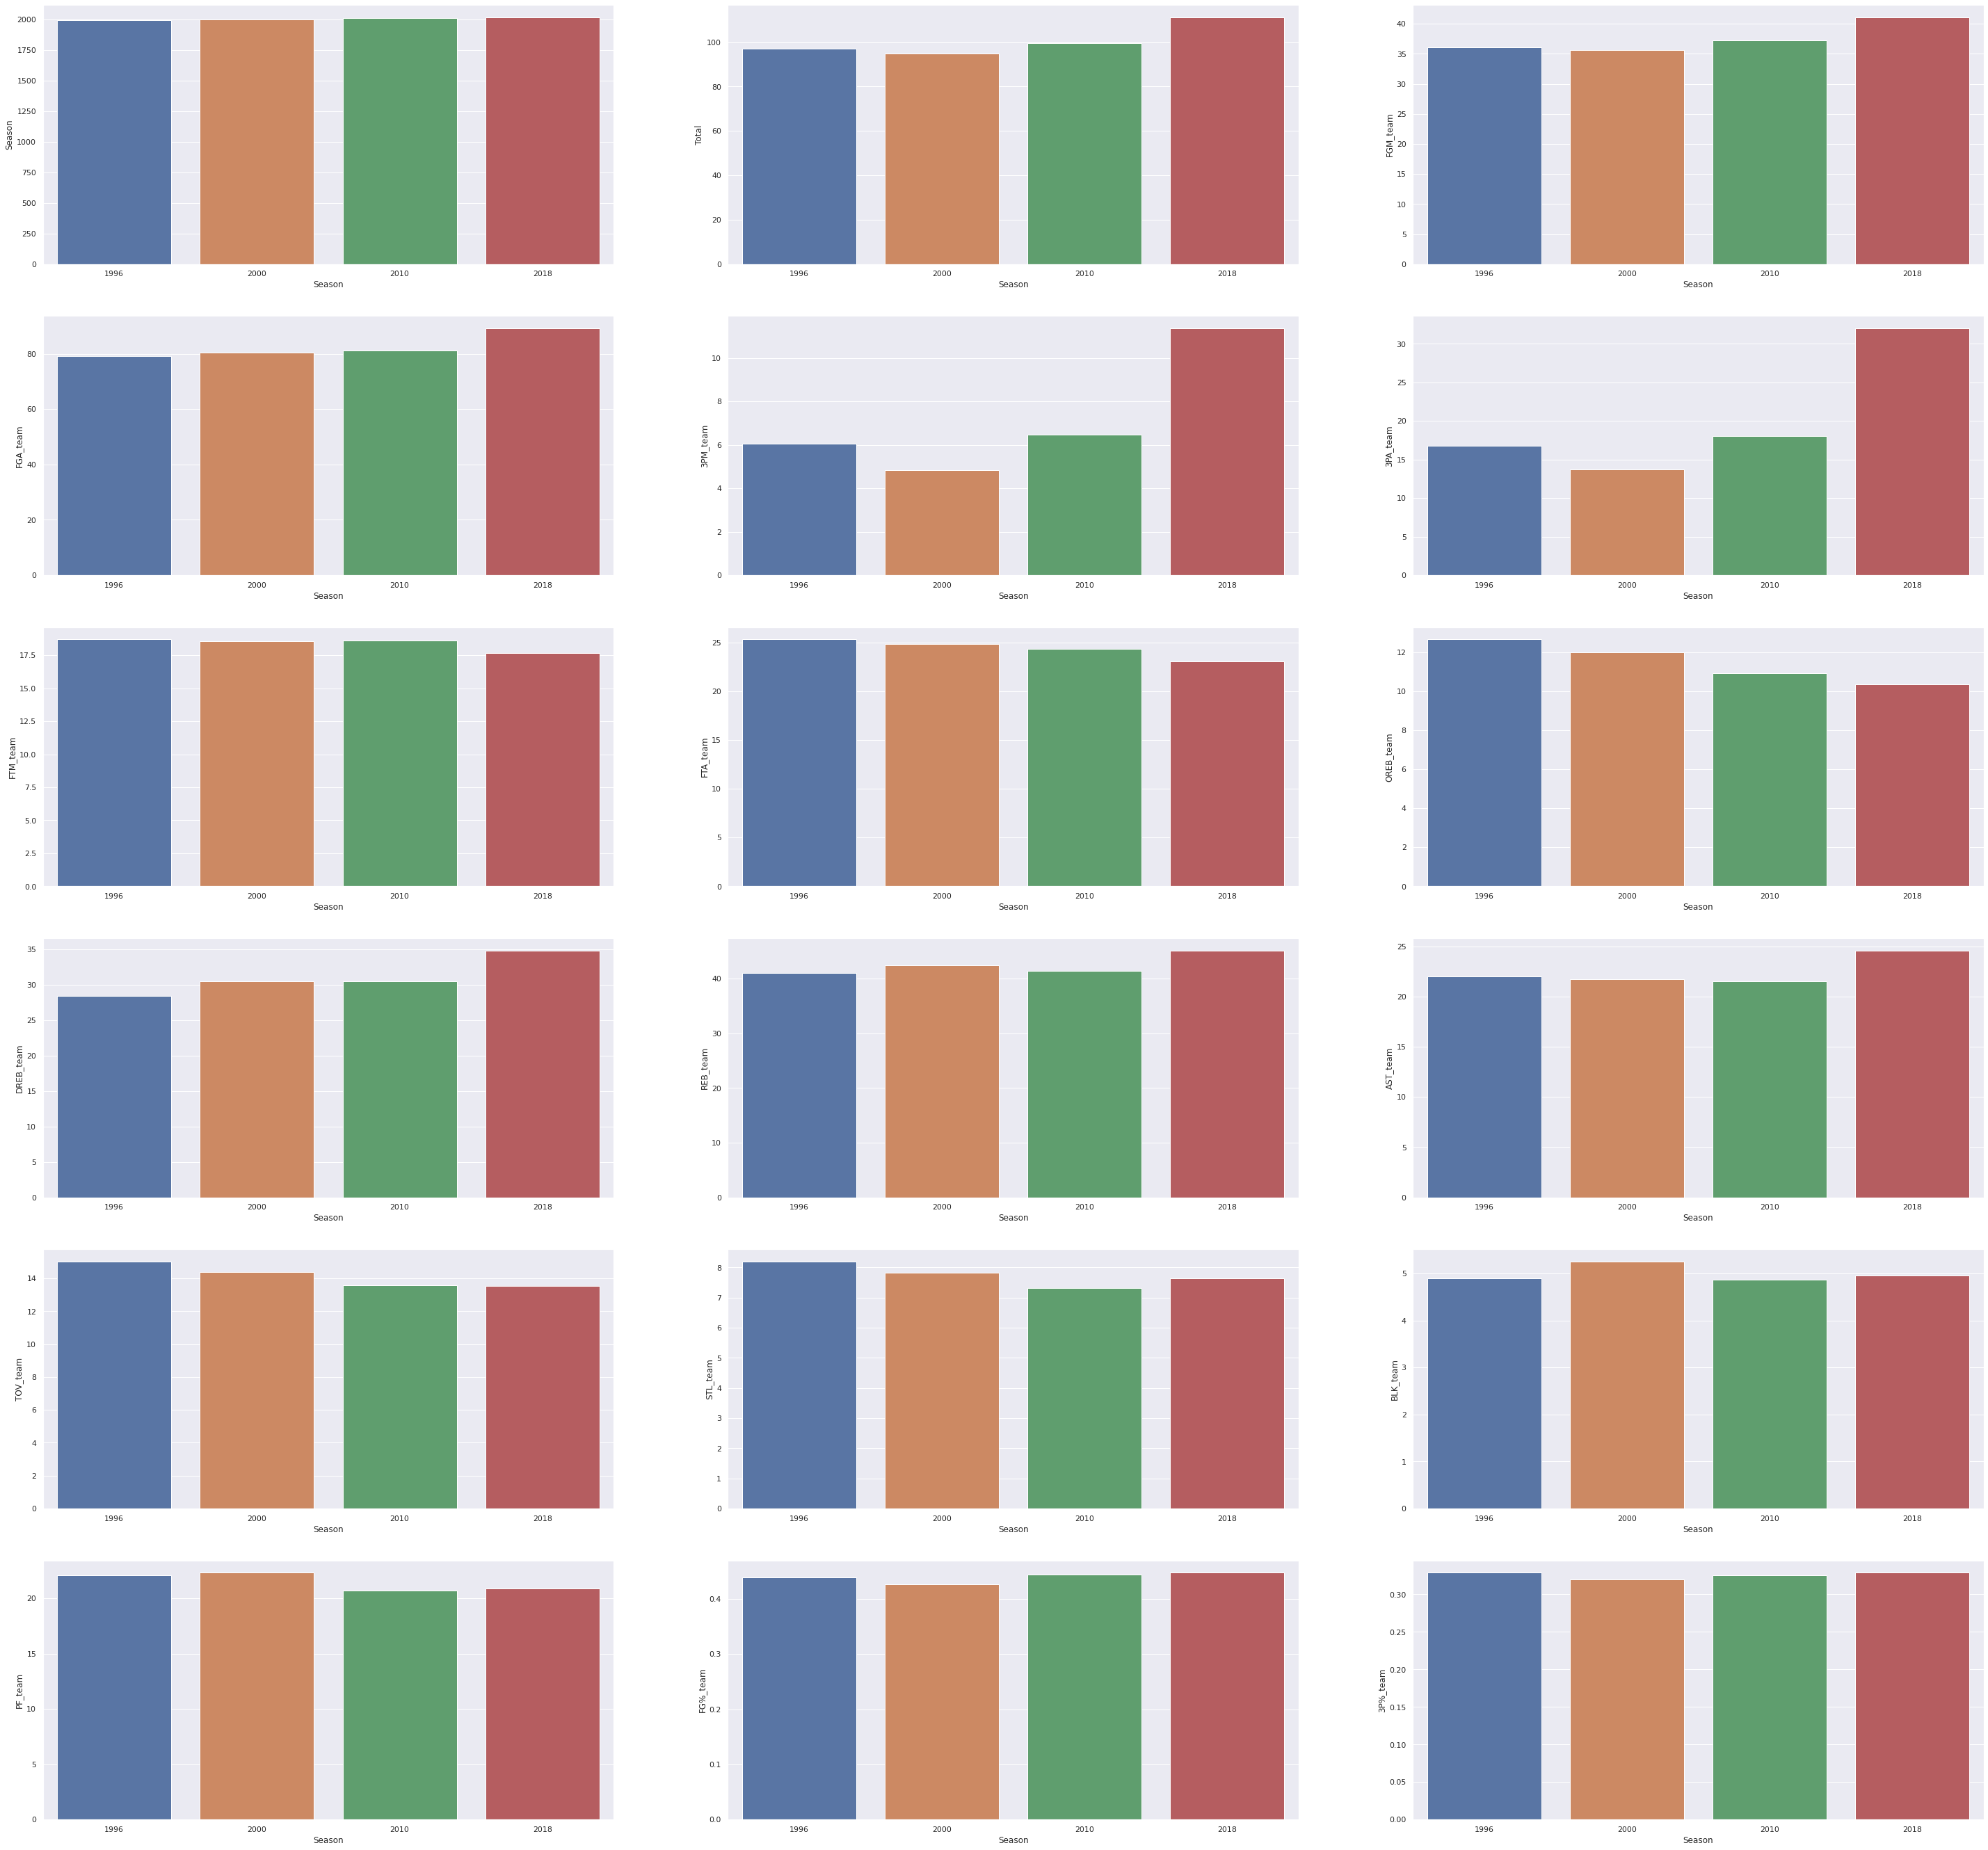

In [57]:
#creating a for loop to create my subplot
sns.set(rc={'figure.figsize':(6,6)})
plt.figure(figsize=(50,48))
for i in enumerate(features):
  #for j in enumerate(limits_up):
    #for k in enumerate(limits_down):
      plt.subplot(6,3,i[0]+1)
      meanplot=sns.barplot(x='Season',y=i[1], data=mean_merged)
      #meanplot.set_ylim([k,j])

- From the **attacking** point of view, it is interesting to see how the number of points has evolved with the years, we can see that players attempt a lot more shots nowadays than they did 20 years ago, especially for the 3PT category which increased from 17 in 1996 to 34 in 2018. This can be related to the increasing number of points and rebounds throughout the decades. Since there are more shots attempted, players obviously do not make them every time and the average number of rebounds has increased. 

- Regarding **rebounds**, it's interesting to see that players in the 90's and 2000's were more agressive on **rebounds** since the number of **offensive rebounds **has decreased from 13 to 10. 
People usually say that the game was more physical back in the days, where players were ready to give their soul to save a rebound, jumping into the public seats for example.

- One of the major other points that stands out if you look at those graphs is the **defensive** part. The number of points has increased because players shoot the ball more, but also because they defend less. The Steals (STL), turnovers (TOV), Free throws attempts (FTA), Field goals made (FGM) are the categories that are interesting. Players used to defend harder in the 96's, they did more steals than in the other seasons, the number of turnovers is directly related to the steals since at the moment a team steals the ball to the other, the other lost the possession which is translated to a turnover.




## **Correlation analysis**

Some estimations about correlation can be stated before realizing the analysis. For example a correlation between FGM and AST can easily be considered since an assist is a pass that leads to a made shot, or a 3 point made will obviously be linked to the number of 3 Pts attempted. Let's first write a small list of estimated correlations and then use the analytical method to see if they are really correlated. 

- FGA/3PA - REB, players take more shots so there are more rebounds.
- FGM/3PM - AST, An assist implies a made shot. 
- FGM - FGA, if a player does not attempt any 2Pt shot, he will not make any 2Pt shot.
- 3PM - 3PA - %3P, if a player does not attempt any 3Pt shot, he will not make any 3 Pt shot.
- FTA/TOV - PF, fouls can lead to Free throws or turnover: if a personnal foul does not lead to free throws, it is a turnover.
- FTM - FTA - %FT, the free throw percentage is the ratio between the FTM and FTA.

 

As I did in the first project, I plot a pairplot 

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.pairplot(season18, plot_kws={'alpha': 0.3})

Let's see what are the correlations between the stats categories.
I will create heatmaps for each season and one for the merged table I created just before and compare them. 

1 : Fully correlated

0 : No relation

-1: Anti-correlated

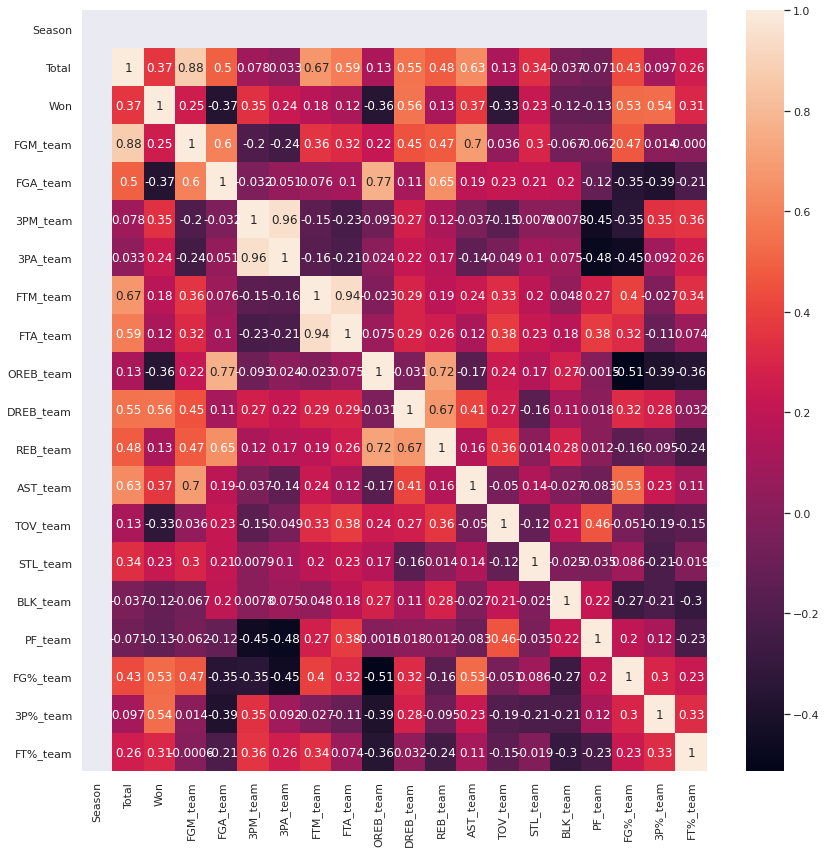

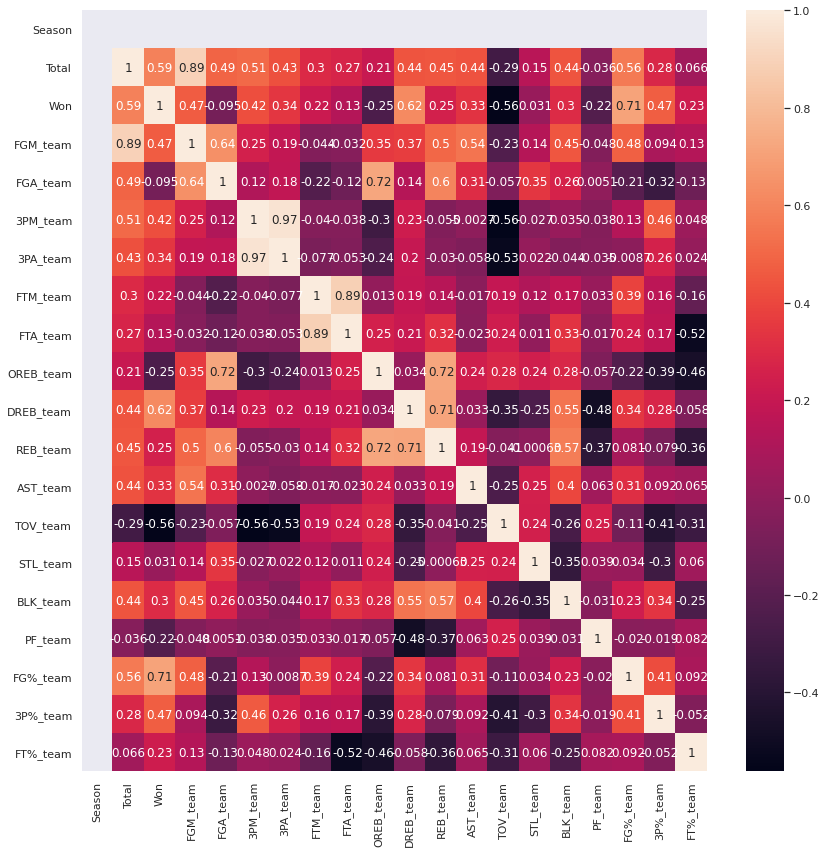

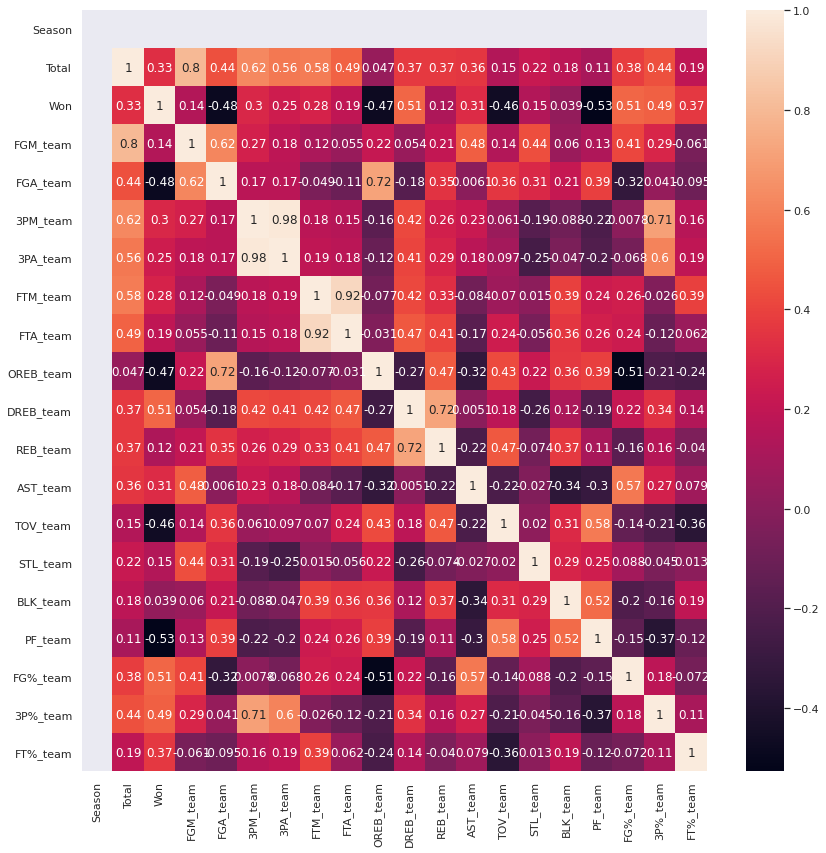

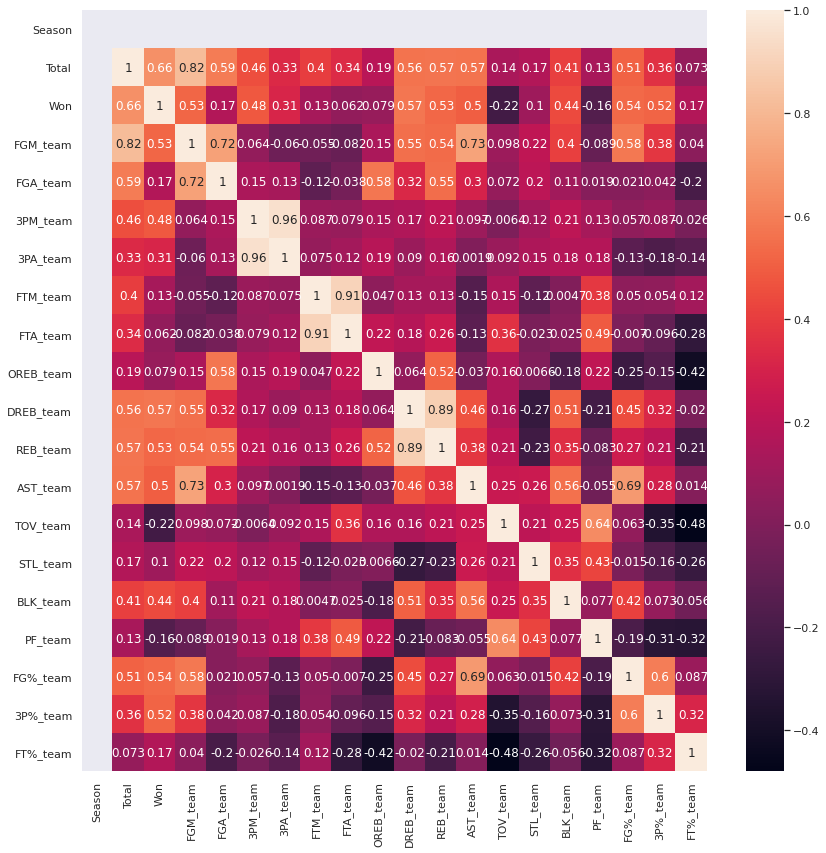

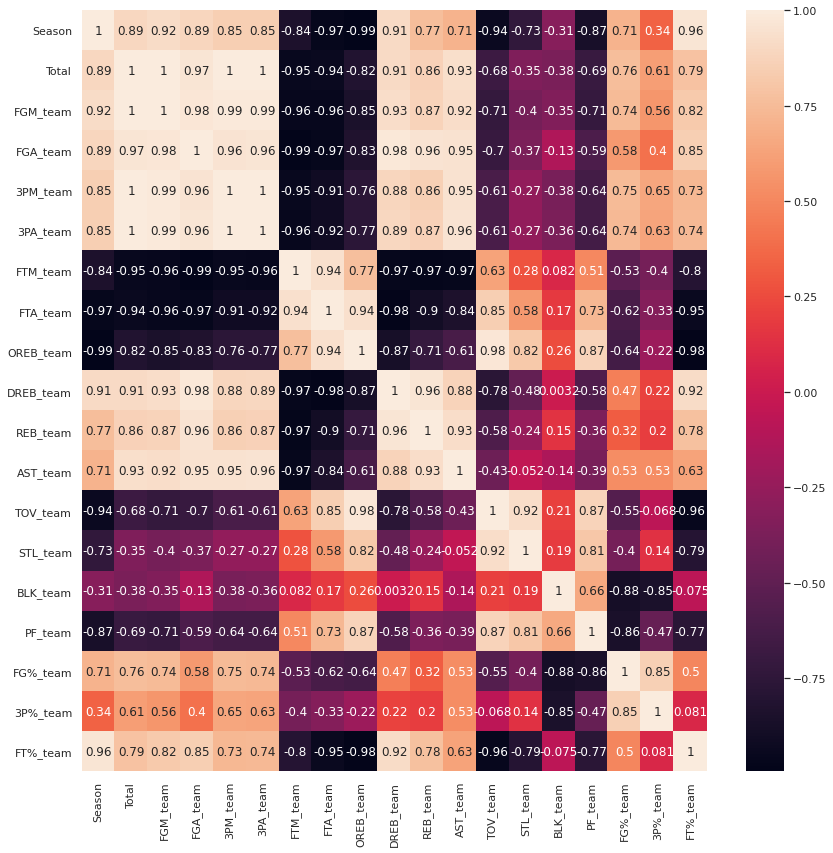

In [58]:
#Heatmap of correlations for season 96
corrMatrix1 = season96.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corrMatrix1, annot=True)
plt.show() 

#Heatmap of correlations for season 00
corrMatrix2 = season00.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corrMatrix2, annot=True)
plt.show() 

#Heatmap of correlations for season 2010
corrMatrix3 = season10.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corrMatrix3, annot=True)
plt.show() 

#Heatmap of correlations for season 2018
corrMatrix4 = season18.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corrMatrix4, annot=True)
plt.show() 

#Heatmap of correlations for all seasons (mean_merged table)
corrMatrix5 = mean_merged.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corrMatrix5, annot=True)
plt.show() 

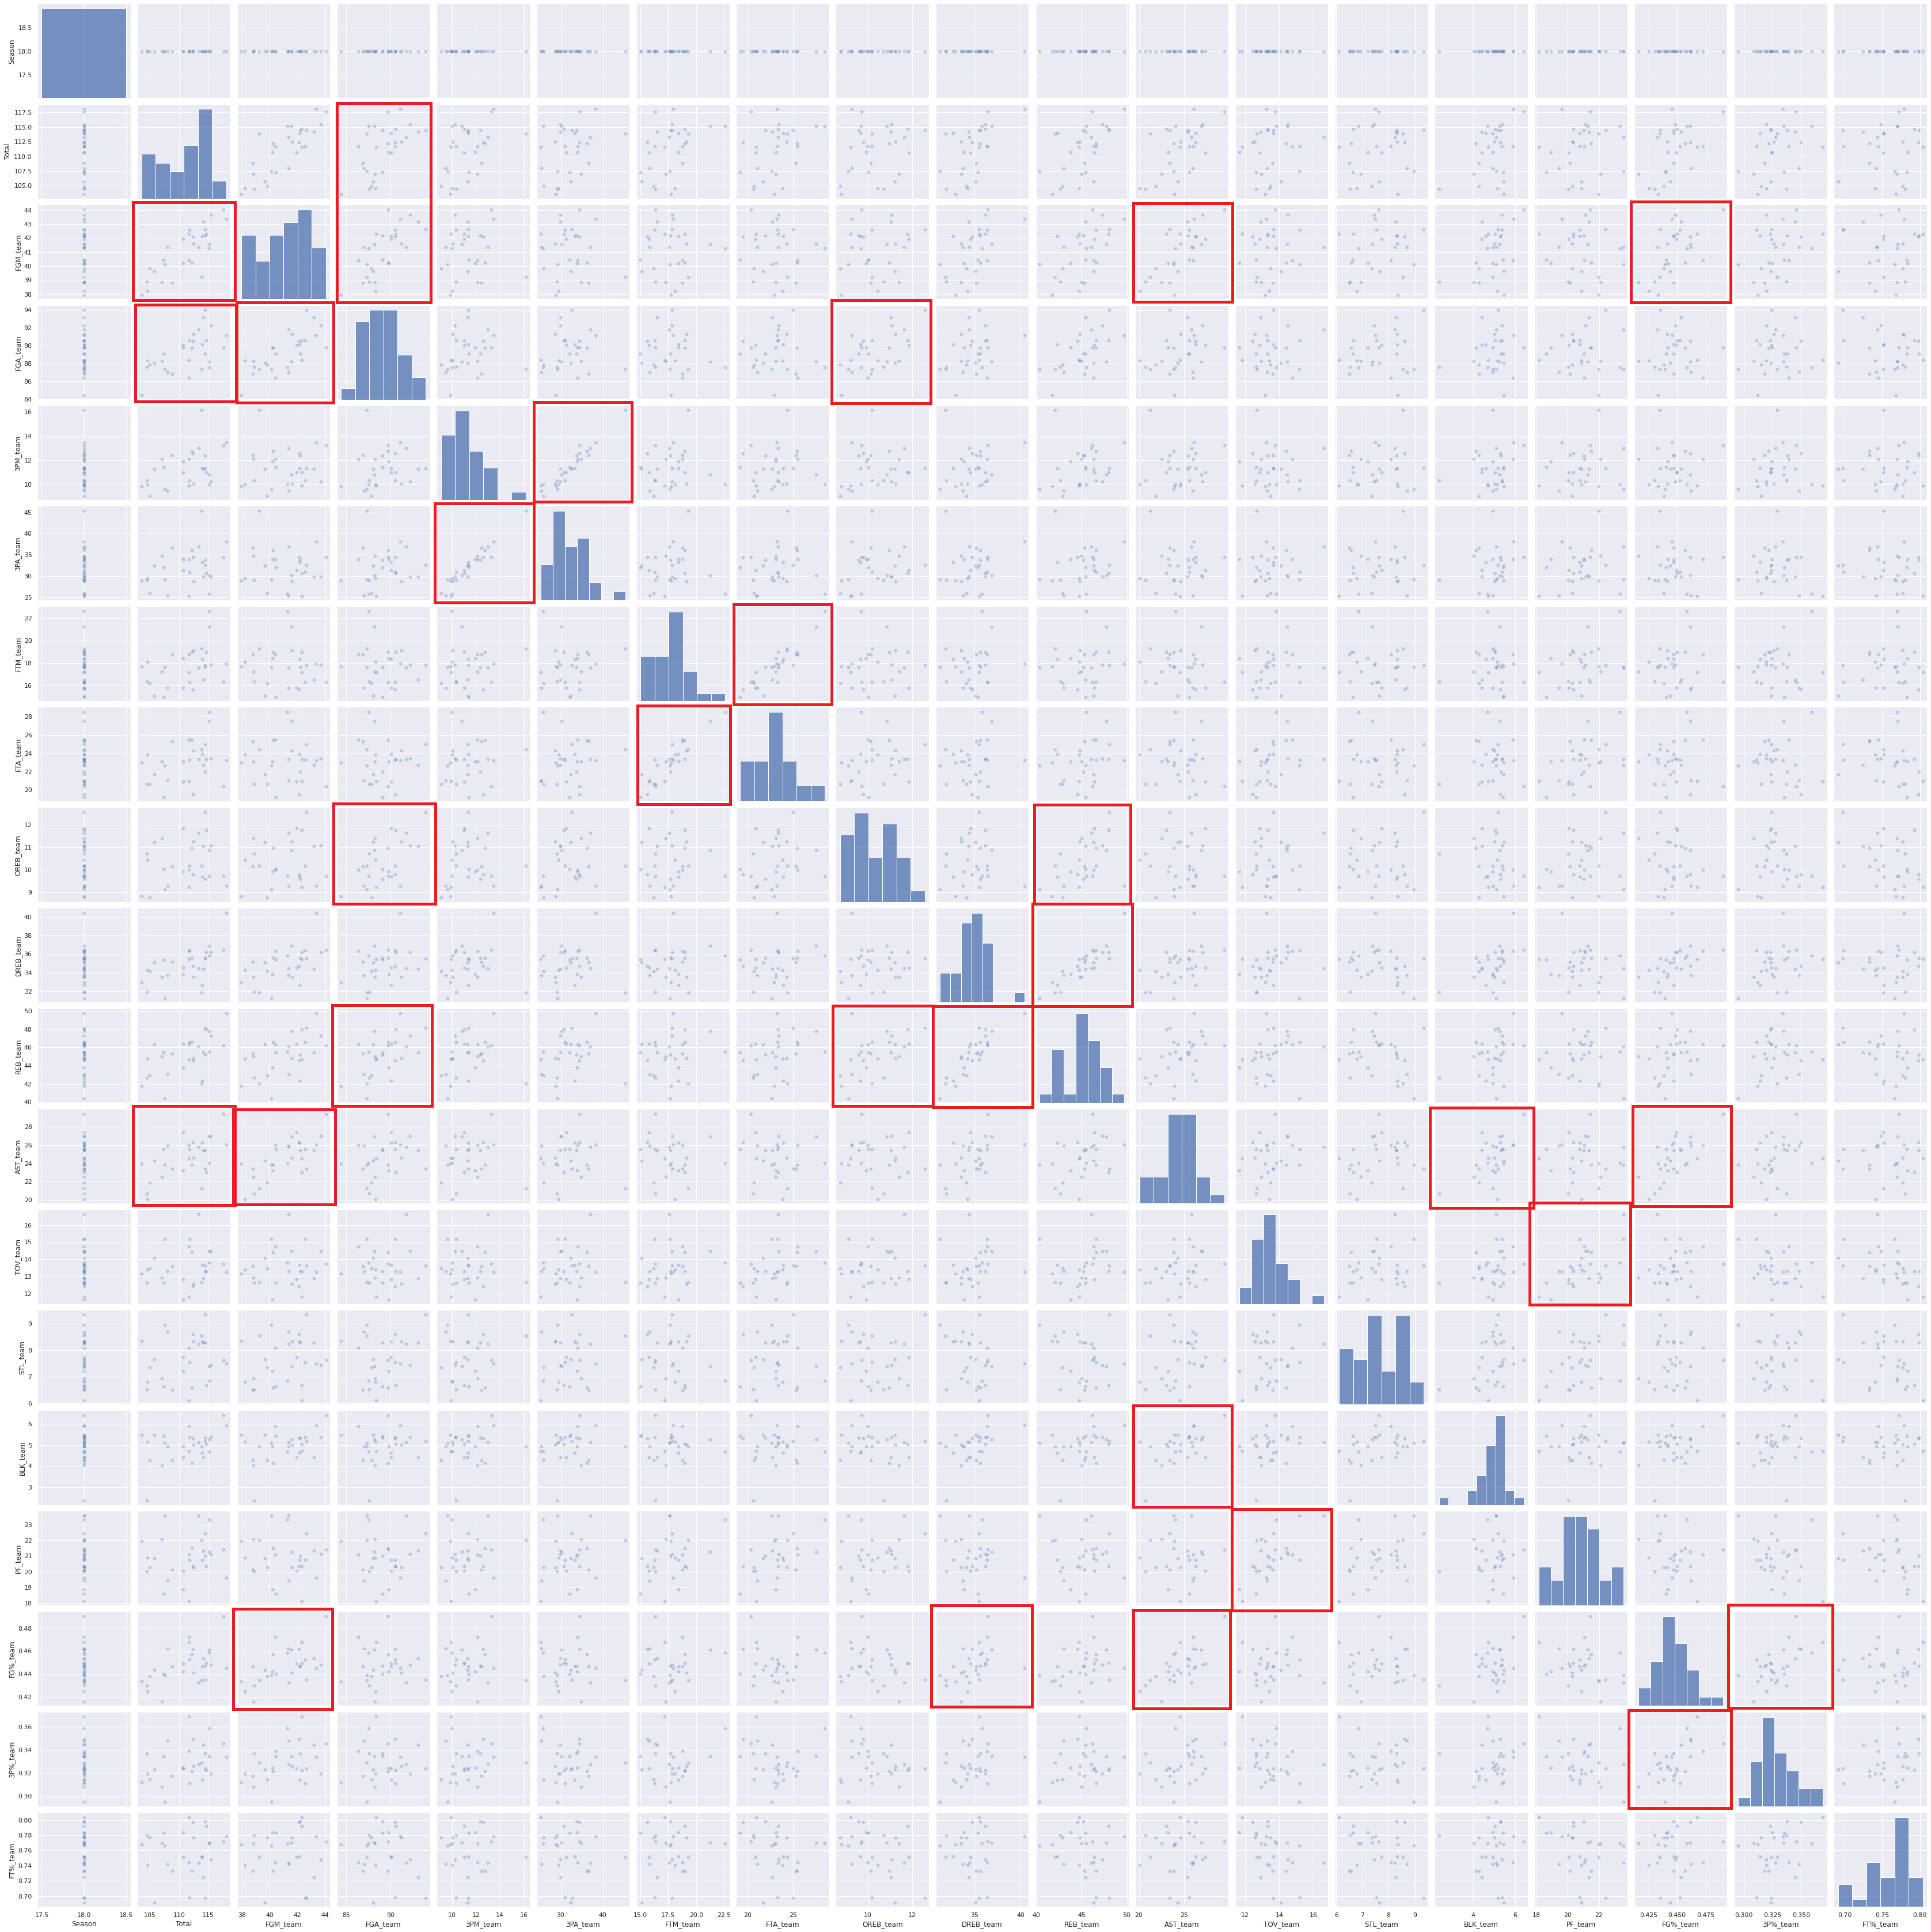

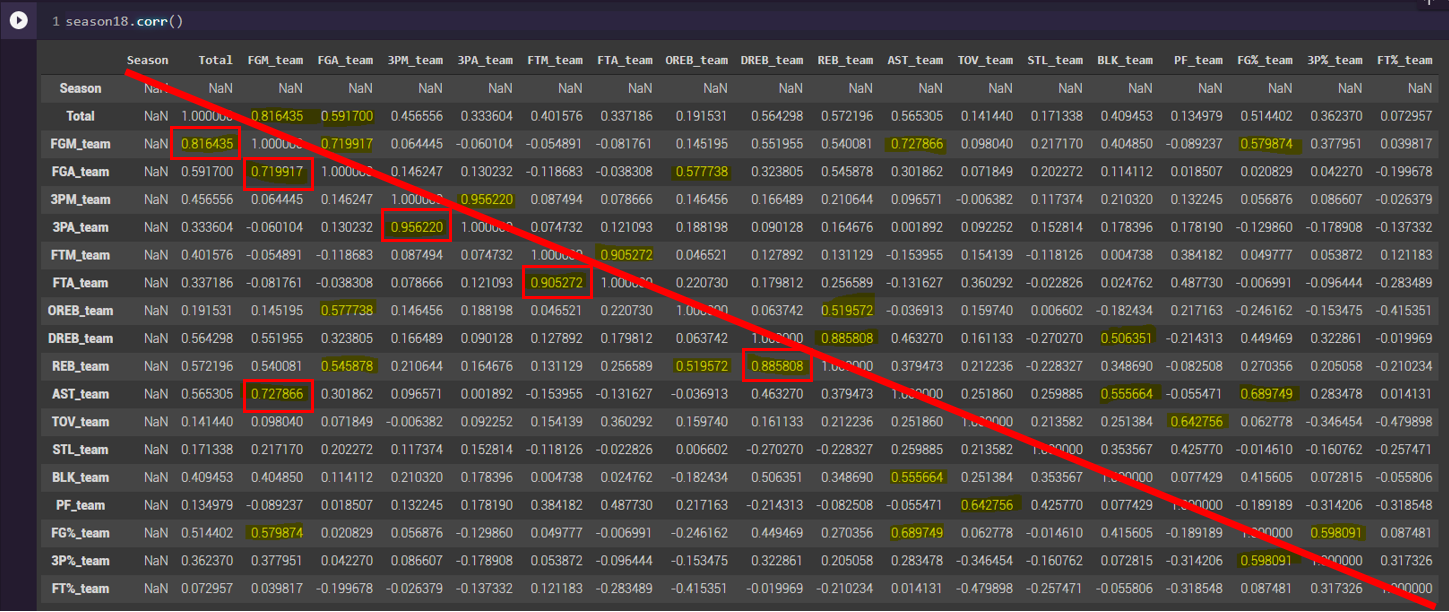

Since there are a lot and there aren't all very interesting to analyze, let's confirm if our estimations were good. We consider only the values over 0.7.
We use the p-value as a threshhold to determine if the statistic meets the criteria ( α ) for significance.

p < 0.01: we are 99% confidence that the finding is accurate

p < 0.05: we are 95% confidence that the finding is accurate

p < 0.1 : we are 90% confidence that the finding is accurate

In [62]:
#First the number of field goals made and the average total number of points correlation:
pearson_coef,p_value = stats.pearsonr(mean_merged['FGM_team'], mean_merged['Total'])
print("The Pearson Correlation Coefficient of the number of field goals made and the average total number of points is", pearson_coef, " with a P-value of P =", p_value) 

#Field goals attempted and field goals made correlation:
pearson_coef,p_value = stats.pearsonr(mean_merged['FGA_team'], mean_merged['FGM_team'])
print("The Pearson Correlation Coefficient of field goals attempted and field goals made is", pearson_coef, " with a P-value of P =", p_value)

#Assists delivered and field goals made correlation:
pearson_coef,p_value = stats.pearsonr(mean_merged['AST_team'], mean_merged['FGM_team'])
print("The Pearson Correlation Coefficient of the number of assists and field goals made is", pearson_coef, " with a P-value of P =", p_value)

#3Pts made and 3Pts attempted correlation:
pearson_coef,p_value = stats.pearsonr(mean_merged['3PM_team'], mean_merged['3PA_team'])
print("The Pearson Correlation Coefficient of 3Pts shot made and 3Pts shot attempted is", pearson_coef, " with a P-value of P =", p_value)

#Free throws made and free throws attempted correlation:
pearson_coef,p_value = stats.pearsonr(mean_merged['FTM_team'], mean_merged['FTA_team'])
print("The Pearson Correlation Coefficient of the number of free throws made and the free throws attempted is", pearson_coef, " with a P-value of P =", p_value)

#Defensive rebounds and rebounds correlation:
pearson_coef,p_value = stats.pearsonr(mean_merged['DREB_team'], mean_merged['REB_team'])
print("The Pearson Correlation Coefficient of the defensive rebound and the total number of rebounds is", pearson_coef, " with a P-value of P =", p_value)

#Turnovers and personnal fouls correlation:
pearson_coef,p_value = stats.pearsonr(mean_merged['TOV_team'], mean_merged['PF_team'])
print("The Pearson Correlation Coefficient of the number of turnovers and the number of personnal fouls is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of the number of field goals made and the average total number of points is 0.9981310652552055  with a P-value of P = 0.0018689347447945481
The Pearson Correlation Coefficient of field goals attempted and field goals made is 0.9759493919163498  with a P-value of P = 0.024050608083650227
The Pearson Correlation Coefficient of the number of assists and field goals made is 0.9223209861941084  with a P-value of P = 0.0776790138058916
The Pearson Correlation Coefficient of 3Pts shot made and 3Pts shot attempted is 0.9998594571698521  with a P-value of P = 0.00014054283014786062
The Pearson Correlation Coefficient of the number of free throws made and the free throws attempted is 0.9426722239878533  with a P-value of P = 0.05732777601214667
The Pearson Correlation Coefficient of the defensive rebound and the total number of rebounds is 0.9631022709231326  with a P-value of P = 0.03689772907686739
The Pearson Correlation Coefficient of the number of turnove

All our estimations are more than 90% accurate except the turnovers and the number of personnal fouls which has an alpha coeff under 0.9 and a P value above 0.1. It is still a close value. But we can see that surprisingly there is a bad correlation between FTA and PF, with a coefficient of 0.48 (However, the biggest of the column).

# **3PTS STUDY**

In [63]:
#Create Scatter plot
scatter2018=px.scatter(season18, x="3PM_team", y="3PA_team", marginal_x="box", marginal_y="box", color="3P%_team",
               size="3P%_team", size_max=10,hover_name="Team", hover_data=['Won'], #trendline="ols", trendline_color_override="red",
              color_continuous_scale=px.colors.diverging.Portland[1::1], width=1200, height=1000,
              title='3PTS Graph study of the season 2018 by teams',
              labels={'3PA_team':"3 Pts attempted", '3PM_team':"3 Points Made", 'REB_team':"Rebounds"})

scatter1996=px.scatter(season96, x="3PM_team", y="3PA_team", marginal_x="box", marginal_y="box", color="3P%_team",
               size="3P%_team", size_max=10,hover_name="Team", hover_data=['Won'], #trendline="ols", trendline_color_override="red"
              color_continuous_scale=px.colors.diverging.Portland[1::1], width=1200, height=1000,
              title='3PTS Graph study of the season 1996 by teams',
              labels={'3PA_team':"3 Pts attempted", '3PM_team':"3 Points Made", 'REB_team':"Rebounds"})

scatter2000=px.scatter(season00, x="3PM_team", y="3PA_team", marginal_x="box", marginal_y="box", color="3P%_team",
               size="3P%_team", size_max=10,hover_name="Team", hover_data=['Won'], #trendline="ols", trendline_color_override="red"
              color_continuous_scale=px.colors.diverging.Portland[1::1], width=1200, height=1000,
              title='3PTS Graph study of the season 2000 by teams',
              labels={'3PA_team':"3 Pts attempted", '3PM_team':"3 Points Made", 'REB_team':"Rebounds"})

scatter2010=px.scatter(season10, x="3PM_team", y="3PA_team", marginal_x="box", marginal_y="box", color="3P%_team",
               size="3P%_team", size_max=10,hover_name="Team", hover_data=['Won'], #trendline="ols", trendline_color_override="red"
              color_continuous_scale=px.colors.diverging.Portland[1::1], width=1200, height=1000,
              title='3PTS Graph study of the season 2010 by teams',
              labels={'3PA_team':"3 Pts attempted", '3PM_team':"3 Points Made", 'REB_team':"Rebounds"})


scatter1996.show()
scatter2000.show()
scatter2010.show()
scatter2018.show()

HOU = OUTLIER, if we remove the outlier, it will affect the mean values. It is really interesting if we want to generalize on the season and not be focused on a certain aspect. 

Offense evolution throughout the decades

In [64]:
Pointsgraph1996=px.bar(season96, x="Team", y="Total",
                   color="3PM_team",
                   hover_name="Team", #trendline="ols", trendline_color_override="red"
                   width=1200, height=400,
                   title='Points per games of the season 1996 by teams'
                  )
Pointsgraph1996.update_yaxes(range=[80,110])
Pointsgraph2018=px.bar(season18, x="Team", y="Total",
                   color="3PM_team",
                   hover_name="Team", #trendline="ols", trendline_color_override="red"
                   width=1200, height=400,
                   title='Points per games of the season 2018 by teams'
                  )
Pointsgraph2018.update_yaxes(range=[100,120])
Pointsgraph2010=px.bar(season10, x="Team", y="Total",
                   color="3PM_team",
                   hover_name="Team", #trendline="ols", trendline_color_override="red"
                   width=1200, height=400,
                   title='Points per games of the season 2010 by teams'
                  )
Pointsgraph2010.update_yaxes(range=[80,110])
Pointsgraph2000=px.bar(season00, x="Team", y="Total",
                   color="3PM_team",
                   hover_name="Team", #trendline="ols", trendline_color_override="red"
                   width=1200, height=400,
                   title='Points per games of the season 2000 by teams'
                  )
Pointsgraph2000.update_yaxes(range=[80,105])
Pointsgraph1996.show()
Pointsgraph2000.show()
Pointsgraph2010.show()
Pointsgraph2018.show()



# **LINEAR REGRESSION**

Let's use our database to see how are the statistical categories involves in the win percentage. 

There are 18 setting parameters and one measured output parameters.

Setting Parameters:

- Points
- FGM
- FGA
- 3PM
- 3PA
- FTM
- FTA
- OREB
- DREB
- REB
- AST
- TOV
- STL
- BLK
- PF
- FG%
- 3P%
- FT%

Measured parameter: Won games (%)

Since our study is dedicated to 3PT shot we will only use the following parameters:
- 3PM
- 3PA
- 3P%

Step 1, defining dependant and independant variables

In [66]:
#Define dependant(target) variables and independant(feature) variables from dataset:
x_data= np.array(season18[['3P%_team']])
y_data = season18.Won

Step __2__, spliting the data

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2) #train data will be 80% and test data 20%

Step __3__, creating a linear regression object

In [68]:
# Define the linear regression object
lml = LinearRegression()

Step __4__, fitting the model (training the  model)

In [69]:
# Fitting the model to the training data
lml.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# reporting the values of weights
w0l=lml.intercept_[0]
w1l=lml.coef_[0][0]
print('w_0=',w0l,' w_1=',w1l)

IndexError: ignored

Step __5__, making predictions

In [71]:
# reporting the values of weights
yhat = lml.predict(x_test)
yhat

array([0.52546189, 0.48018273, 0.51818151, 0.47260361, 0.56274843,
       0.62162598])

In [72]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(y_test,yhat)
print('The value of mean squared error is: %.2f' %MSE)

The value of mean squared error is: 0.04


In [73]:
# R2
from sklearn.metrics import r2_score

r2score = r2_score(y_test,yhat)
print('The value of R2 is: %.2f' %r2score)

The value of R2 is: -0.38


In [74]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAE=mean_absolute_error(y_test,yhat)
print('The value of mean absolute error is: %.2f' %MAE)

The value of mean absolute error is: 0.16


In [ ]:
plt.figure(figsize=(10,10))                       # set the size of the figure
plt.rc('font',size=15)                            # set the font size

# Plotting the train data
plt.scatter(x_train,y_train,s=100,color='blue',label='Training Data')

# Plotting the train data
plt.scatter(x_test,y_test,s=100,color='red', label='Test Data')

# Plotting the fitted line
xplot=np.linspace(0,0.2,num=100)
yplot=w0l+w1l*xplot
plt.plot(xplot,yplot,LineWidth=4,color='green', label='Fitted Line')

# Labling and putting legend
plt.xlabel('Layer Height (mm)')
plt.ylabel('Roughness (micrometer)')
plt.grid(True)
plt.legend(loc='best');

# **BONUS STUDY: Golden State Warriors - Best season of all time**

I import the season where the Golden State Warriors finished with an all time record of 73 wins for 9 losses. In this analysis I will compare the evolution of the game of GSW with the past seasons

In [75]:
df15=df[df['Season']==15]
season15 = df15.groupby(['Team','Season'],as_index=False).mean().iloc[:, 0:21]
season15

,Team,Season,Total,Won,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team
0,ATL,15,102.841463,0.585366,38.634146,84.426829,9.939024,28.365854,15.634146,19.975610,8.280488,33.804878,42.085366,25.609756,14.524390,9.109756,5.926829,19.146341,0.439396,0.321725,0.780881
1,BKN,15,98.646341,0.256098,38.243902,84.390244,6.475610,18.390244,15.682927,20.719512,10.524390,31.878049,42.402439,22.304878,14.317073,7.646341,4.048780,18.000000,0.427436,0.319343,0.745161
2,BOS,15,105.719512,0.585366,39.219512,89.243902,8.743902,26.121951,18.536585,23.524390,11.585366,33.329268,44.914634,24.158537,13.463415,9.170732,4.243902,21.902439,0.423242,0.307875,0.768336
3,CHA,15,103.402439,0.585366,37.024390,84.414634,10.646341,29.390244,18.707317,23.670732,8.951220,34.987805,43.939024,21.682927,11.865854,7.256098,5.341463,18.134146,0.429714,0.353668,0.784137
4,CHI,15,101.646341,0.512195,38.597561,87.439024,7.939024,21.378049,16.512195,20.975610,11.060976,35.231707,46.292683,22.804878,13.329268,6.036585,5.731707,18.841463,0.421570,0.325747,0.764123
5,CLE,15,104.329268,0.695122,38.670732,84.000000,10.731707,29.609756,16.256098,21.743902,10.646341,33.865854,44.512195,22.695122,12.878049,6.719512,3.865854,20.317073,0.449671,0.339487,0.752132
6,DAL,15,102.292683,0.512195,37.365854,84.146341,9.829268,28.560976,17.731707,22.329268,9.158537,33.914634,43.073171,22.109756,12.329268,6.829268,3.731707,19.451220,0.438601,0.308161,0.785925
7,DEN,15,101.890244,0.402439,37.719512,85.402439,8.000000,23.695122,18.451220,24.073171,11.475610,33.146341,44.621951,22.658537,14.170732,7.426829,4.817073,21.012195,0.421771,0.295933,0.756310
8,DET,15,101.963415,0.536585,37.939024,86.426829,9.024390,26.195122,17.060976,25.548780,12.451220,33.865854,46.317073,19.439024,12.963415,6.987805,3.707317,18.987805,0.422434,0.326341,0.704718
9,GSW,15,114.890244,0.890244,42.548780,87.304878,13.134146,31.609756,16.658537,21.829268,9.951220,36.243902,46.195122,28.939024,14.865854,8.402439,6.073171,20.743902,0.479026,0.366375,0.753511


In [76]:
scatter2015=px.scatter(season15, x="3PM_team", y="3PA_team", marginal_x="box", marginal_y="box", color="3P%_team",
               size="3P%_team", size_max=10,hover_name="Team", hover_data=['Won'], #trendline="ols", trendline_color_override="red"
              color_continuous_scale=px.colors.diverging.Portland[1::1], width=1200, height=1000,
              title='3PTS Graph study of the season 2010 by teams',
              labels={'3PA_team':"3 Pts attempted", '3PM_team':"3 Points Made", 'REB_team':"Rebounds"})
scatter2015.show()

In [78]:
gsw96=season96.iloc[:9]
gsw96=gsw96.drop([0,1,2,3,4,5,6,7])
gsw00=season00.iloc[:9]
gsw00=gsw00.drop([0,1,2,3,4,5,6,7])
gsw10=season10.iloc[:10]
gsw10=gsw10.drop([0,1,2,3,4,5,6,7,8])
gsw15=season15.iloc[:10]
gsw15=gsw15.drop([0,1,2,3,4,5,6,7,8])
gsw18=season18.iloc[:10]
gsw18=gsw18.drop([0,1,2,3,4,5,6,7,8])


Now let's merge what I extracted in a single table.

In [79]:
gsw_frames = [gsw96, gsw00, gsw10, gsw15, gsw18]
gsw_merged=pd.concat(gsw_frames) 
gsw_merged

,Team,Season,Total,Won,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team
8,GSW,96,99.646341,0.365854,36.524390,80.012195,5.865854,16.621951,20.682927,26.585366,13.243902,27.524390,40.768293,22.170732,16.500000,7.463415,4.378049,21.792683,0.436566,0.322247,0.752215
8,GSW,0,92.487805,0.207317,35.817073,87.500000,3.439024,11.756098,17.414634,24.682927,16.402439,29.085366,45.487805,21.804878,15.280488,9.048780,5.000000,21.060976,0.395281,0.255029,0.700183
9,GSW,10,103.378049,0.439024,39.646341,85.939024,8.353659,21.329268,15.731707,20.670732,11.646341,28.902439,40.548780,22.524390,14.109756,8.987805,4.951220,22.024390,0.442643,0.356525,0.729763
9,GSW,15,114.890244,0.890244,42.548780,87.304878,13.134146,31.609756,16.658537,21.829268,9.951220,36.243902,46.195122,28.939024,14.865854,8.402439,6.073171,20.743902,0.479026,0.366375,0.753511
9,GSW,18,117.682927,0.695122,44.048780,89.768293,13.256098,34.439024,16.329268,20.390244,9.719512,36.463415,46.182927,29.426829,13.756098,7.621951,6.402439,21.426829,0.490475,0.345256,0.771583


Now we have our little dataframe let's exploit it and create some graphs

Let's modify the season's dates to have the good graduation on the x axis

In [80]:
gsw_merged.iloc[0,1]=1996
gsw_merged.iloc[1,1]=2000
gsw_merged.iloc[2,1]=2010
gsw_merged.iloc[3,1]=2015
gsw_merged.iloc[4,1]=2018
gsw_merged

,Team,Season,Total,Won,FGM_team,FGA_team,3PM_team,3PA_team,FTM_team,FTA_team,OREB_team,DREB_team,REB_team,AST_team,TOV_team,STL_team,BLK_team,PF_team,FG%_team,3P%_team,FT%_team
8,GSW,1996,99.646341,0.365854,36.524390,80.012195,5.865854,16.621951,20.682927,26.585366,13.243902,27.524390,40.768293,22.170732,16.500000,7.463415,4.378049,21.792683,0.436566,0.322247,0.752215
8,GSW,2000,92.487805,0.207317,35.817073,87.500000,3.439024,11.756098,17.414634,24.682927,16.402439,29.085366,45.487805,21.804878,15.280488,9.048780,5.000000,21.060976,0.395281,0.255029,0.700183
9,GSW,2010,103.378049,0.439024,39.646341,85.939024,8.353659,21.329268,15.731707,20.670732,11.646341,28.902439,40.548780,22.524390,14.109756,8.987805,4.951220,22.024390,0.442643,0.356525,0.729763
9,GSW,2015,114.890244,0.890244,42.548780,87.304878,13.134146,31.609756,16.658537,21.829268,9.951220,36.243902,46.195122,28.939024,14.865854,8.402439,6.073171,20.743902,0.479026,0.366375,0.753511
9,GSW,2018,117.682927,0.695122,44.048780,89.768293,13.256098,34.439024,16.329268,20.390244,9.719512,36.463415,46.182927,29.426829,13.756098,7.621951,6.402439,21.426829,0.490475,0.345256,0.771583


Now we have our new database we can analyze it visually to show GSW peak.

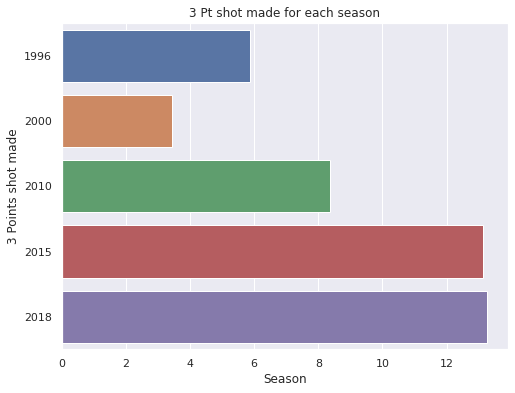

In [81]:
sns.set(rc={'figure.figsize':(6,6)})

fig = px.line(gsw_merged, x="Season", y=gsw_merged.Won*100, title='Win percentage of GSW throughout the seasons', labels={"y":"Win percentage"})
fig.show()

fig = px.line(gsw_merged, x="Season", y=gsw_merged.Total, title='Win percentage of GSW throughout the seasons', labels={"y":"Win percentage"})
fig.show()

sns.set(rc={'figure.figsize':(8,6)})
fig1=sns.barplot(x='3PM_team',y='Season',
                data=gsw_merged,
                orient='h')
plt.xlabel('Season')
plt.ylabel('3 Points shot made')
plt.title('3 Pt shot made for each season')
fig.show()


In [ ]:
fig2=sns.barplot(x='Season',y='3P%_team',
                data=gsw_merged,
                orient='v')
plt.xlabel('Season')
plt.ylabel('3 Points percentage')
plt.title('3 Points percentage for each season')

# **CONCLUSION** <a name="CCL"></a>

We can conclude this study saying that the game has changed from a shooting point of view, teams score generally more points, shoot the ball a lot more than they used to, especially with the development of the 3Pt shot. 
It has become a real weapon that teams assimilated which made the average of points per game increase. 

The limits of this study are mainly that it only focuses on years rather than decades. The best would have been to select 3 or 4 chunks of seasons, do an average value on them and compare them. It would have translated in a better way the evolution of the game based on several successive years.

Another point that could be explored with this database would be to compare the efficiency of the teams evolutions throughout the decades. 
Ex: if the 3PA of a team has largely increased, has their PPG increased ? If so, has the team had better results ? What about the theams which did not follow the same evolution path ? 
Or else performing power rankings between teams and seasons to see which are the best. 

This database offers many possibilities to explore. 